In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)

from imblearn.combine import SMOTEENN

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/prak ai/heart.csv')

In [ ]:
print("Data awal:")
data.head()

Data awal:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print("\nInfo data:")
data.info()


Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
print("\nMissing values per kolom:")
print(data.isnull().sum())


Missing values per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


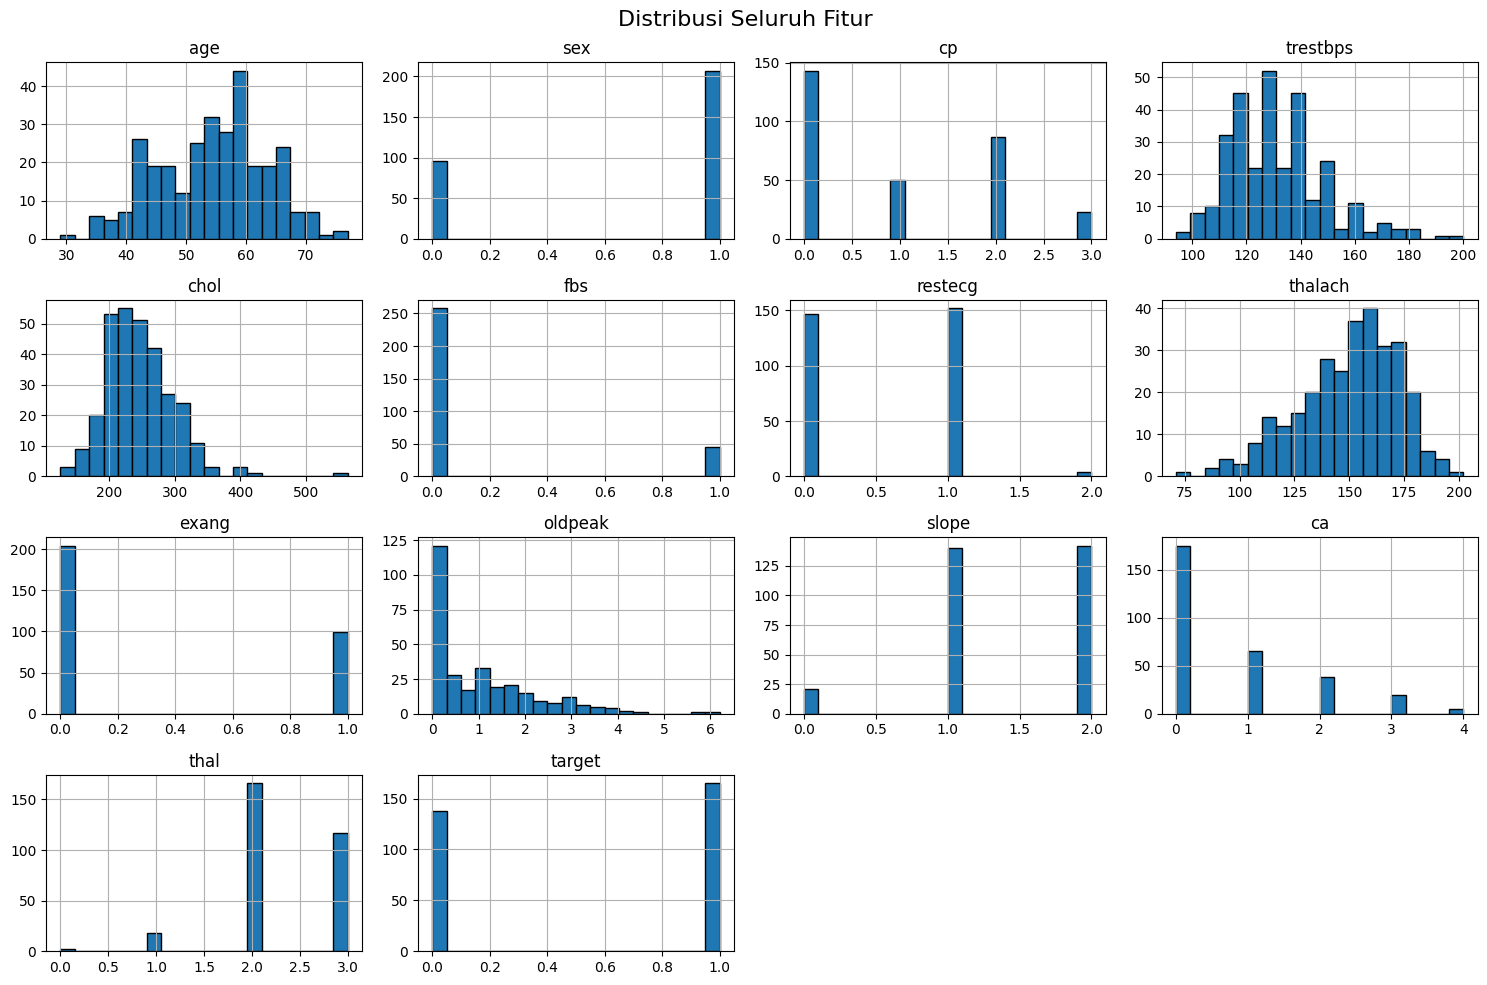

In [ ]:
data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Distribusi Seluruh Fitur", fontsize=16)
plt.tight_layout()
plt.show()


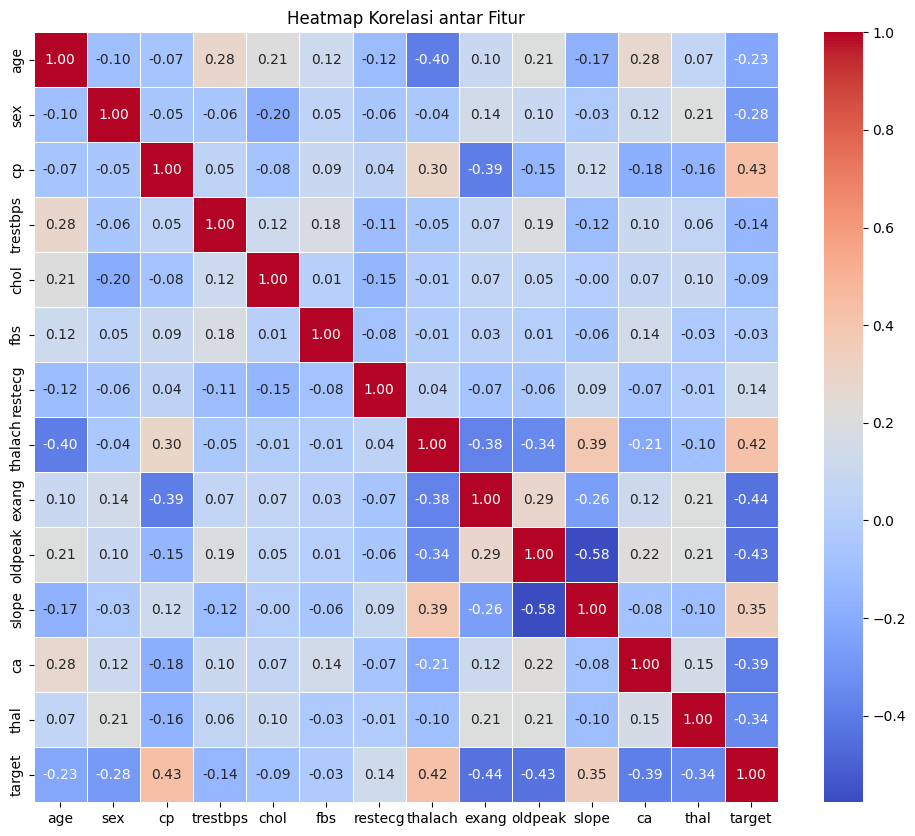

In [ ]:
plt.figure(figsize=(12,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi antar Fitur")
plt.show()

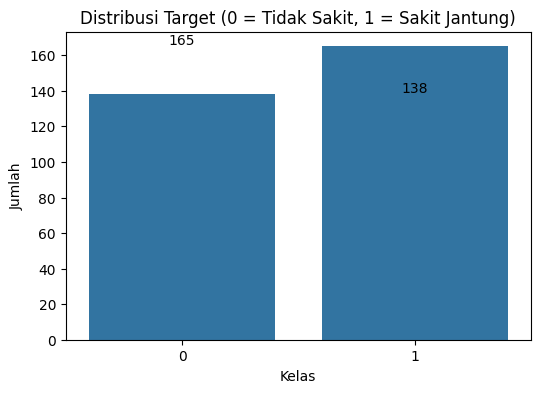

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=data)
plt.title("Distribusi Target (0 = Tidak Sakit, 1 = Sakit Jantung)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
class_counts = data['target'].value_counts()
for index, value in enumerate(class_counts):
    plt.text(index, value + 1, str(value), ha='center')
plt.show()

In [ ]:
# 3. Pisahkan Fitur dan Target
X = data.drop('target', axis=1)
y = data['target']

In [ ]:

# 4. Penyeimbangan Data dengan SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [ ]:
print(data.dtypes)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
# 5. Split Data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


In [ ]:
# 6. Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 7. Pelatihan Model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 8. Prediksi
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]  # untuk ROC AUC


In [ ]:
# 9. Evaluasi Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9473684210526315
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333
ROC AUC: 0.988095238095238


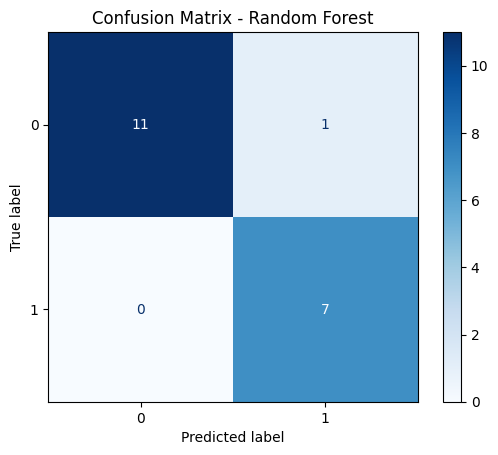

In [ ]:
# 10. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

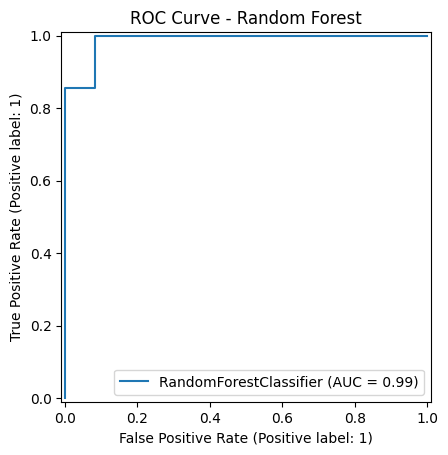

In [ ]:
# 11. Visualisasi ROC Curve
RocCurveDisplay.from_estimator(rf, X_test_scaled, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

In [ ]:
# 12. Visualisasi Feature Importance
importances = rf.feature_importances_
feature_names = X.columns

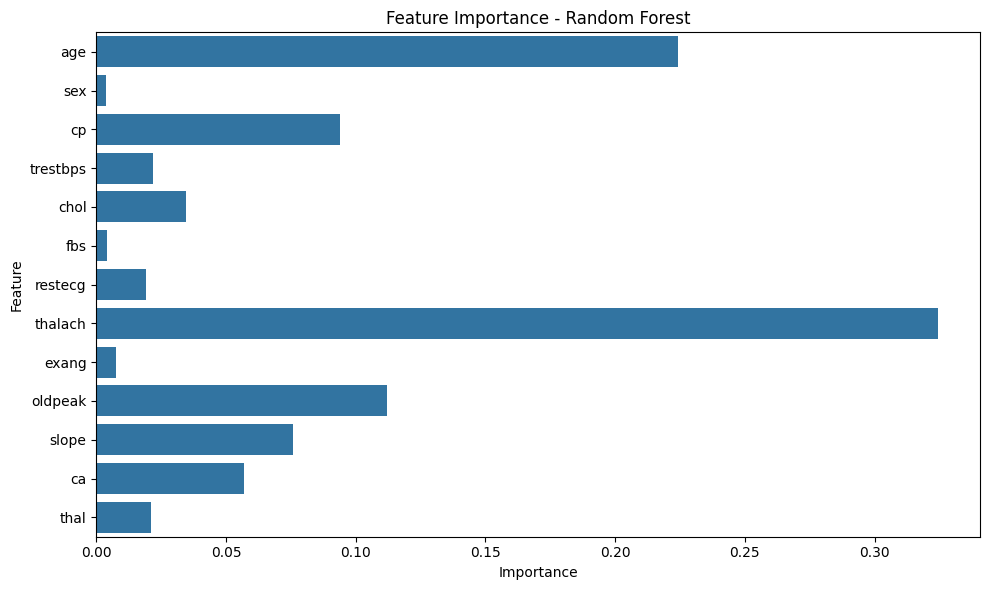

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()